 # House Prices - Advanced Regression Techniques  - Final notebook

 


In [424]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV,StratifiedKFold,cross_val_score
from sklearn.metrics import r2_score
sns.set_context("paper", font_scale = 1, rc={"grid.linewidth": 3})
pd.set_option('display.max_rows', 100, 'display.max_columns', 400)
from scipy.stats import skew,boxcox_normmax
from scipy.special import boxcox1p
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor,XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor


# 1- Reading the Dataset

In [910]:
!pip install mlxtend 

In [838]:
!pip install lightgbm

In [839]:
!pip install xgboost

In [425]:
train = pd.read_csv('train.csv')
#pd.set_option('display.max_rows', trainSet.shape[0]+1)

test = pd.read_csv('test.csv')
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))

print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))


The train data has 1460 rows and 81 columns
The test data has 1459 rows and 80 columns


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [426]:
# Drop ID columns as they are unnecessary in our analysis
train.drop('Id',axis='columns',inplace=True)

train.shape

(1460, 80)

In [427]:
test.drop('Id',axis='columns',inplace=True)

In [428]:
test.shape

(1459, 79)

# 2- Exploratory Data Analysis

Dealing with Missing Values:
The table below shows the number of missing values in columns with at least one missing value.

In [429]:
#Train Set
missing_value = train.isna().sum()
missing_value = missing_value[missing_value > 0]
percent_missing = missing_value * 100 / train.shape[0]
pd.concat([missing_value, percent_missing], axis=1,
          keys=['Train Missing Values', 'Percentage']).sort_values(by="Train Missing Values", ascending=False)

,Train Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


Out of 81 features, 19 features have missing values (in the train dataset)

The percentage of missing values in PoolQC, Miscellaneous feature, Alley, Fence, and FireplaceQu 
is very high (above 40%) and our hypothesis that each house without one of these features has a missing value, 
the following example verifies that :

In [430]:
train["MiscVal"].value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [9]:
#Test Set
missing_value = test.isna().sum()
missing_value = missing_value[missing_value > 0]
percent_missing = missing_value * 100 / test.shape[0]
pd.concat([missing_value, percent_missing], axis=1,
          keys=['Test Missing Values', 'Percentage']).\
          sort_values(by="Test Missing Values", ascending=False)

,Test Missing Values,Percentage
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageYrBlt,78,5.346127
GarageQual,78,5.346127
GarageFinish,78,5.346127


In [431]:
numerical_feature =[feature for feature in train.columns if train[feature].dtypes != 'O']
print('The number of numerical variables: ', len(numerical_feature))
train[numerical_feature].head(5)

The number of numerical variables:  37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [432]:
categorical_feature = [feature for feature in train.columns if train[feature].dtypes == 'O']
print('The number of categorical variables: ', len(categorical_feature))
train[categorical_feature].head(5)

The number of categorical variables:  43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


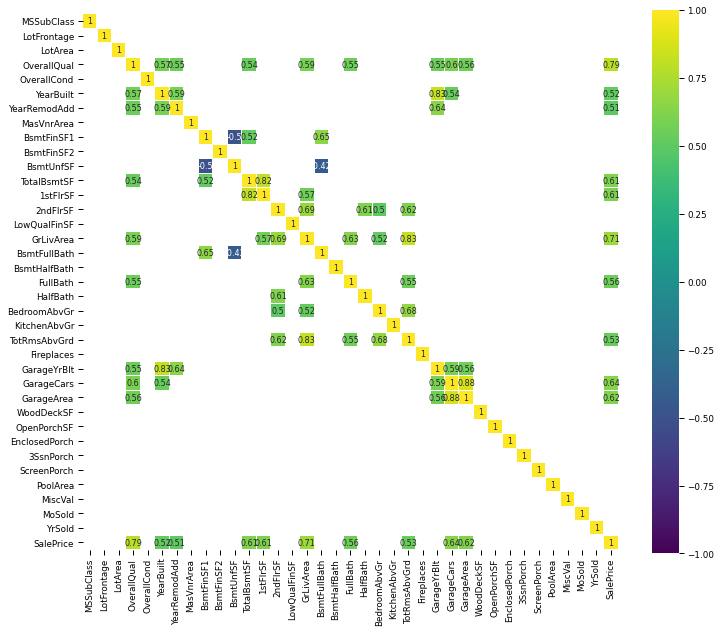

In [433]:
corrMap = train.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corrMap[(corrMap >= 0.5) | (corrMap <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [232]:
salesprice_corrlist = corrMap['SalePrice'].sort_values(ascending = False)
salesprice_corrlist

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

#### Correlation 

 
 1 - Relationship between features (predictors) :
we notice that Garage Cars and Garage Area have high positive correlation when the
garage area increases, its car capacity increases too. also that Gr Liv Area and TotRms
AbvGrd are highly positively correlated , when living area above
ground increases, it is expected for the rooms above ground to increase too.

Regarding negative correlation, we can see that Bsmt Unf SF is negatively correlated with
BsmtFin SF 1, when we have more unfinished area, this means that we have less finished area.
In addition to that Bsmt Unf SF is negatively correlated with Bsmt
Full Bath.

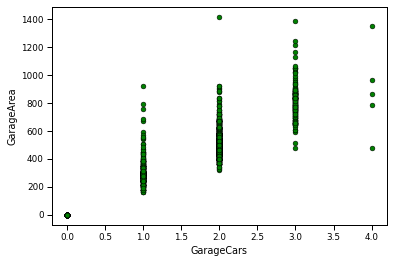

In [434]:
plt.scatter(x=train['GarageCars'], y=train['GarageArea'],
color="green", edgecolors="#000000", linewidths=0.5);
plt.xlabel("GarageCars"); plt.ylabel("GarageArea");

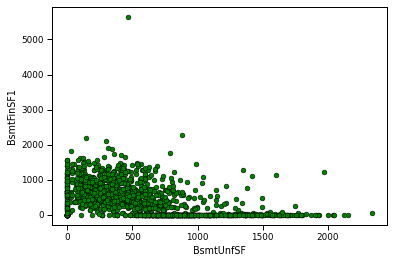

In [435]:
plt.scatter(x=train['BsmtUnfSF'], y=train['BsmtFinSF1'],
color="green", edgecolors="#000000", linewidths=0.5);
plt.xlabel("BsmtUnfSF"); plt.ylabel("BsmtFinSF1");

2 - Relationship between SalePrice and predictors

 According to what we saw in the heatmap, Overall Qual and Gr Liv Area  are highly and positively correlated with 
SalePrice.

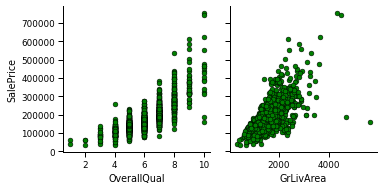

In [436]:
x_vars = ["OverallQual", "GrLivArea"]
g = sns.PairGrid(train, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="green", edgecolors="#000000", linewidths=0.5)

Finally we visualize the relationship between SalePrice and the below predictors

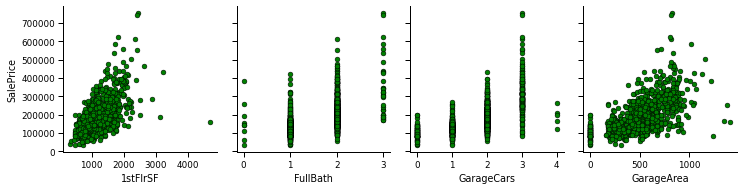

In [437]:
x_vars = ["1stFlrSF", "FullBath", "GarageCars", "GarageArea"]
g = sns.PairGrid(train, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="green", edgecolors="#000000", linewidths=0.5);

### Dealing with skewness

Skewness differentiates in extreme values in one versus the other tail. We can see Positive Skewness
in our target variable distribution which means the tail on the right side of the distribution is longer 

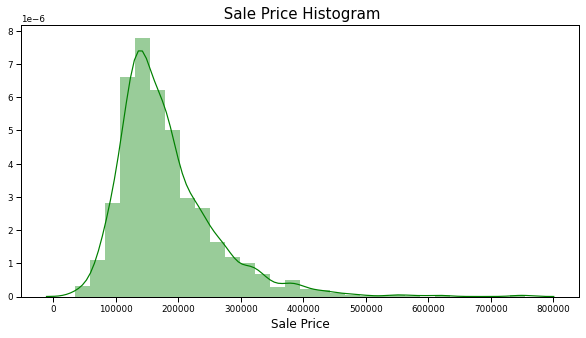

In [438]:
# Log transform target variable

fig, TargetPlot = plt.subplots(figsize=(10,5))

sns.distplot(train.SalePrice, bins=30, kde=True, ax=TargetPlot, color='green')
plt.title(' Sale Price Histogram', fontsize=15)
plt.xlabel('Sale Price', fontsize=12);



we can see from the graph that most house prices fall Between 100K - 250K

In [107]:
print ("The skewness of SalePrice is {}".format(train['SalePrice'].skew()))

The skewness of SalePrice is 1.8828757597682129


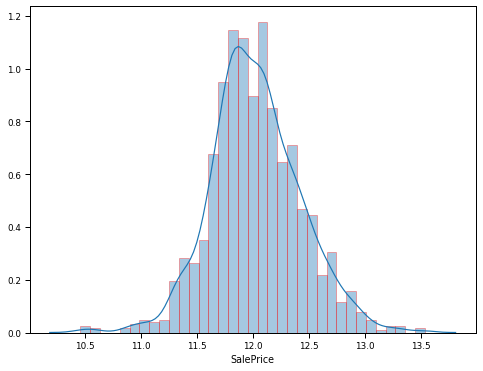

In [439]:
# SalePrice variable is normally distributed
#trainSet['SalePrice'] = np.log(trainSet['SalePrice'])
train['SalePrice'] = np.log1p(train['SalePrice'])

plt.figure(figsize=(8,6))
sns.distplot(train['SalePrice'],hist_kws={"edgecolor": (1,0,0,1)})

In [109]:
print ("The skewness of SalePrice after log transform {}".format(train['SalePrice'].skew()))

The skewness of SalePrice after log transform 0.12134661989685333


# 3- Data Cleaning


##### Outliers Removal

From documentation, the author recommends removing any houses with more than
4000 square feet from the data set (which eliminates these five unusual observations in GrLivArea and SalePrice)

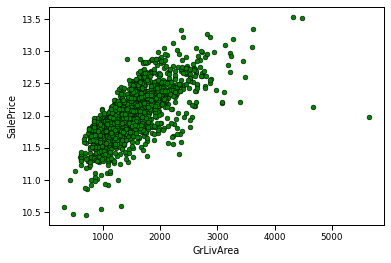

In [442]:
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'],
color="green", edgecolors="#000000", linewidths=0.5);
plt.xlabel("GrLivArea"); plt.ylabel("SalePrice");

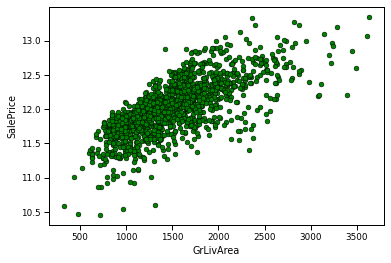

In [443]:
# After removing the unusual data points
train = train[(train["GrLivArea"] < 4000) | (train['SalePrice'] > 200000)]
train.reset_index(drop = True, inplace = True)

plt.scatter(x=train['GrLivArea'], y=train['SalePrice'],
color="green", edgecolors="#000000", linewidths=0.5);
plt.xlabel("GrLivArea"); plt.ylabel("SalePrice");

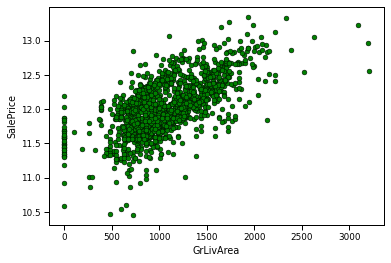

In [444]:
plt.scatter(x=train['TotalBsmtSF'], y=train['SalePrice'],
color="green", edgecolors="#000000", linewidths=0.5);
plt.xlabel("GrLivArea"); plt.ylabel("SalePrice");

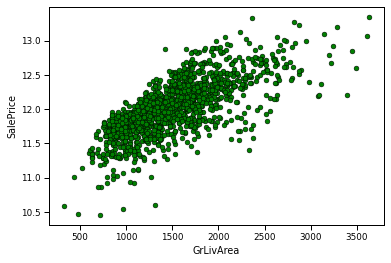

In [445]:
train = train[(train["TotalBsmtSF"] < 3000) ]
train.reset_index(drop = True, inplace = True)

plt.scatter(x=train['GrLivArea'], y=train['SalePrice'],
color="green", edgecolors="#000000", linewidths=0.5);
plt.xlabel("GrLivArea"); plt.ylabel("SalePrice");

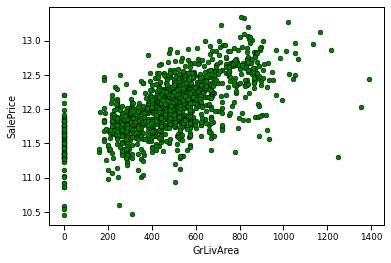

In [446]:
plt.scatter(x=train['GarageArea'], y=train['SalePrice'],
color="green", edgecolors="#000000", linewidths=0.5);
plt.xlabel("GrLivArea"); plt.ylabel("SalePrice");

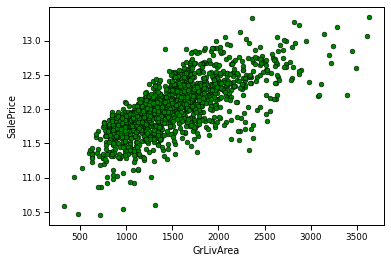

In [447]:
train = train[(train["GarageArea"] < 1200) ]
train.reset_index(drop = True, inplace = True)

plt.scatter(x=train['GrLivArea'], y=train['SalePrice'],
color="green", edgecolors="#000000", linewidths=0.5);
plt.xlabel("GrLivArea"); plt.ylabel("SalePrice");

Merging train and test Sets to impute missing values in both : We tried multiple ways to fill the missing values
and we didn't drop any feature at this point because we needed to explore the data more and the multicollinearity between features.

In [448]:
y=train['SalePrice']
trainSet=train.drop('SalePrice',axis=1)
testSet = test
DataFrame= pd.concat([trainSet,testSet]).reset_index(drop=True)

In [449]:
DataFrame["PoolQC"].fillna("No Pool", inplace=True)
DataFrame['MiscFeature'].fillna('No feature', inplace=True)
DataFrame['Alley'].fillna('No Alley', inplace=True)
DataFrame['Fence'].fillna('No Fence', inplace=True)
DataFrame['FireplaceQu'].fillna('No Fireplace', inplace=True)
DataFrame['LotFrontage'].fillna(0, inplace=True) # 0 means the house is not connected to any street

According to the percentage of missing values in the above tables the features Garage Type ,Garage Cond, Garage Qual, Garage Finish, Garage Yr Blt have 81 missing values 

In [450]:
for col in ['GarageType','GarageCond', 'GarageQual','GarageFinish' ]:
  DataFrame[col].fillna('No Garage', inplace=True)

DataFrame['GarageYrBlt'].fillna(0, inplace=True) # 0 since this is a numerical feature


In [451]:

DataFrame.loc[~pd.isna(DataFrame['BsmtCond']) &
pd.isna(DataFrame['BsmtExposure']), "BsmtExposure"] = "No" # No Basement

DataFrame.loc[~pd.isna(DataFrame['BsmtFinType1']) &
pd.isna(DataFrame['BsmtExposure']), "BsmtExposure"] = "No Exposure" 

DataFrame.loc[~pd.isna(DataFrame['BsmtFinType1']) &
pd.isna(DataFrame['BsmtFinType2']), "BsmtFinType2"] = "Unf" # Unfinished

DataFrame.loc[~pd.isna(DataFrame['BsmtCond']) &
pd.isna(DataFrame['BsmtFinType2']), "BsmtFinType2"] = "Unf" 


DataFrame.loc[~pd.isna(DataFrame['BsmtQual']) &
pd.isna(DataFrame['BsmtFinType2']), "BsmtFinType2"] = "Unf" # Unfinished

for col in ["BsmtCond","BsmtExposure", "BsmtQual","BsmtFinType2",
            "BsmtFinType1" ]:
  DataFrame[col].fillna("No Basement", inplace=True)


In [452]:
# Both of the features Mas Vnr Area and Mas Vnr Type have 8 missing values , will fill in these None and 0

DataFrame['MasVnrArea'].fillna(0, inplace=True) # 0 for area
DataFrame['MasVnrType'].fillna("None", inplace=True) # None indicates No masonry veneer

In [453]:
# Electrical feature has one missing value so will fill in with the value that appears most in the column
DataFrame['Electrical'].fillna(DataFrame['Electrical'].mode()[0], inplace=True)

In [454]:
for col in ["BsmtHalfBath", "BsmtFullBath", "TotalBsmtSF",
            "BsmtUnfSF", "BsmtFinSF2", "BsmtFinSF1" , 'GarageCars', 'GarageArea']:
  DataFrame[col].fillna(0, inplace=True)

DataFrame['MSZoning'].fillna('Not Classified', inplace=True)
DataFrame['Functional'].fillna('No Functionality', inplace=True)
DataFrame['Utilities'].fillna('No Utilities', inplace=True)
DataFrame['KitchenQual'].fillna(testSet['KitchenQual'].mode()[0], inplace=True)
DataFrame['Exterior2nd'].fillna(testSet['Exterior2nd'].mode()[0], inplace=True)
DataFrame['Exterior1st'].fillna(testSet['Exterior1st'].mode()[0], inplace=True)
DataFrame['SaleType'].fillna(testSet['SaleType'].mode()[0], inplace=True)

In [455]:
DataFrame.isna().values.sum()


0

In [456]:
DataFrame.shape

(2908, 79)

In [457]:

skewed_feature = DataFrame.select_dtypes(include=['int64','float64']).apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

highly_skewed = skewed_feature[skewed_feature > 0.5]
skew_index = highly_skewed.index
skewness = pd.DataFrame({'Skew' :highly_skewed})
skewed_feature

MiscVal          21.915535
PoolArea         18.679169
LotArea          13.174879
LowQualFinSF     12.065521
3SsnPorch        11.354131
KitchenAbvGr      4.292873
BsmtFinSF2        4.160680
EnclosedPorch     4.010734
ScreenPorch       3.949058
BsmtHalfBath      3.937277
MasVnrArea        2.606868
OpenPorchSF       2.528328
WoodDeckSF        1.852019
MSSubClass        1.371866
1stFlrSF          1.225203
GrLivArea         0.976330
BsmtFinSF1        0.975039
BsmtUnfSF         0.913121
2ndFlrSF          0.839599
TotRmsAbvGrd      0.751283
Fireplaces        0.728742
HalfBath          0.696554
BsmtFullBath      0.626496
TotalBsmtSF       0.572522
OverallCond       0.566614
BedroomAbvGr      0.327609
MoSold            0.198542
OverallQual       0.177617
FullBath          0.158490
GarageArea        0.157431
YrSold            0.132245
LotFrontage      -0.134195
GarageCars       -0.226058
YearRemodAdd     -0.447940
YearBuilt        -0.597439
GarageYrBlt      -3.897511
dtype: float64

In [458]:
for i in skew_index:
    DataFrame[i] = boxcox1p(DataFrame[i], boxcox_normmax(DataFrame[i] + 1))

#### Feature Engineering

In this section, we will use the insights from Exploratory Data Analysis section to engineer the
features of our dataset.

Drop the features which have low coorelation with saleprice and high percentage of missing values

In [459]:
DataFrame.drop(["PoolQC", 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'  ], axis=1, inplace=True)


# Consider them deleted , have a correlation with 'YearBuilt' and 'OverallQual' which are already considered

DataFrame.drop(["MasVnrArea", 'MasVnrType'  ], axis=1, inplace=True)

# just delete the observation with missing data

DataFrame = DataFrame.drop(DataFrame.loc[DataFrame['Electrical'].isnull()].index)



####  Multicollinearity

We noticed that there are some predictor features that are highly correlated with each
other, To avoid the Multicollinearity problem, we will delete one feature from each pair

In [460]:
DataFrame.drop(["GarageArea", "TotRmsAbvGrd"], axis=1, inplace=True) #  delete one feature from each pair of Garage Area 
#and TotRms AbvGrd


In [461]:
DataFrame.reset_index(drop = True, inplace = True)

In [462]:
DataFrame.isna().values.sum()

0

In [463]:
DataFrame.shape

(2908, 70)

Create some new features.

In [464]:
# Developing new features based on the existing ones
DataFrame['TotalHouseQuality'] = DataFrame['OverallQual'] + DataFrame['OverallCond']
DataFrame["TotalSF"] = DataFrame["GrLivArea"] + DataFrame["TotalBsmtSF"]
DataFrame["TotalPorchSF"] = DataFrame["OpenPorchSF"] + DataFrame["EnclosedPorch"] + DataFrame["3SsnPorch"] + DataFrame["ScreenPorch"]
DataFrame["TotalBath"] = DataFrame["FullBath"] + DataFrame["BsmtFullBath"] + 0.5 * (DataFrame["BsmtHalfBath"] + DataFrame["HalfBath"])
DataFrame['BuildingAge'] = 2021 - DataFrame['YearBuilt']
DataFrame['Total_sqr_footage'] = DataFrame['BsmtFinSF1'] + DataFrame['BsmtFinSF2'] +DataFrame['1stFlrSF'] + DataFrame['2ndFlrSF']
DataFrame['haspool'] = DataFrame['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
DataFrame['has2ndfloor'] = DataFrame['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
DataFrame['hasbsmt'] = DataFrame['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
DataFrame['hasfireplace'] = DataFrame['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
DataFrame['hasgarage'] = DataFrame['GarageCars'].apply(lambda x: 1 if x > 0 else 0)
# DataFrame['Garage'] = DataFrame['GarageCars'] * DataFrame['GarageArea']

In [54]:
DataFrame.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalHouseQuality,TotalSF,TotalPorchSF,TotalBath,BuildingAge,Total_sqr_footage,haspool,has2ndfloor,hasbsmt,hasfireplace,hasgarage
0,6.496470,RL,65.0,13.814166,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,3.990794,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,145.417641,Unf,0.0,29.980694,428.722884,GasA,Ex,Y,SBrkr,6.023631,1131.534668,0.0,9.174785,0.993321,0.000000,2,1.068398,3,0.750725,Gd,Typ,0.000000,Attchd,2003.0,RFn,2.0,TA,TA,Y,0.000000,12.068573,0.000000,0.0,0.0,0.0,0.0,2,2008,WD,Normal,10.990794,437.897669,12.068573,3.527520,18,1282.975939,0,1,1,0,1
1,4.248191,RL,80.0,14.098337,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,5.998648,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,183.457555,Unf,0.0,44.117753,603.252943,GasA,Ex,Y,SBrkr,6.328707,0.000000,0.0,8.723673,0.000000,0.709505,2,0.000000,3,0.750725,TA,Typ,0.903167,Attchd,1976.0,RFn,2.0,TA,TA,Y,56.082229,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,WD,Normal,11.998648,611.976616,0.000000,2.354752,45,189.786263,0,0,1,1,1
2,6.496470,RL,68.0,14.456047,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,3.990794,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,111.368373,Unf,0.0,56.871648,456.805697,GasA,Ex,Y,SBrkr,6.080598,1148.208545,0.0,9.239975,0.993321,0.000000,2,1.068398,3,0.750725,Gd,Typ,0.903167,Attchd,2001.0,RFn,2.0,TA,TA,Y,0.000000,9.892475,0.000000,0.0,0.0,0.0,0.0,9,2008,WD,Normal,10.990794,466.045672,9.892475,3.527520,20,1265.657516,0,1,1,1,1
3,6.859019,RL,60.0,14.086645,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,3.990794,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,TA,Gd,No,ALQ,62.232148,Unf,0.0,64.779251,384.322731,GasA,Gd,Y,SBrkr,6.114979,995.805300,0.0,9.180903,0.993321,0.000000,1,0.000000,3,0.750725,Gd,Typ,0.903167,Detchd,1998.0,Unf,3.0,TA,TA,Y,0.000000,8.958759,16.025051,0.0,0.0,0.0,0.0,2,2006,WD,Abnorml,10.990794,393.503633,24.983810,1.993321,106,1064.152428,0,1,1,1,1
4,6.496470,RL,84.0,15.000168,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,3.990794,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,137.839668,Unf,0.0,61.138966,553.770099,GasA,Ex,Y,SBrkr,6.252617,1409.410824,0.0,9.553298,0.993321,0.000000,2,1.068398,4,0.750725,Gd,Typ,0.903167,Attchd,2000.0,RFn,3.0,TA,TA,Y,42.176200,14.256416,0.000000,0.0,0.0,0.0,0.0,12,2008,WD,Normal,11.990794,563.323397,14.256416,3.527520,21,1553.503108,0,1,1,1,1


In [465]:
DataFrame.isna().values.sum()

0

Ordinal Variables

We will map each one of the possible values of these feature to a number.


In [466]:
mapOrdinal = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
DataFrame['ExterQual'] = DataFrame['ExterQual'].map(mapOrdinal)
DataFrame['ExterCond'] = DataFrame['ExterCond'].map(mapOrdinal)
DataFrame['HeatingQC'] = DataFrame['HeatingQC'].map(mapOrdinal)
DataFrame['KitchenQual'] = DataFrame['KitchenQual'].map(mapOrdinal)
mapOrdinal = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}
DataFrame['BsmtQual'] = DataFrame['BsmtQual'].map(mapOrdinal)
DataFrame['BsmtCond'] = DataFrame['BsmtCond'].map(mapOrdinal)
DataFrame['BsmtExposure'] = DataFrame['BsmtExposure'].map(
{'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})
mapOrdinal = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
DataFrame['BsmtFinType1'] = DataFrame['BsmtFinType1'].map(mapOrdinal)
DataFrame['BsmtFinType2'] = DataFrame['BsmtFinType2'].map(mapOrdinal)
DataFrame['GarageFinish'] = DataFrame['GarageFinish'].map(
{'Fin':3,'RFn':2,'Unf':1,'No Garage':0})
DataFrame['GarageQual'] = DataFrame['GarageQual'].map(
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
DataFrame['GarageCond'] = DataFrame['GarageCond'].map(
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})





In [467]:
DataFrame.isna().values.sum()

0

In [468]:
DataFrame.shape

(2908, 81)

### Get Dummies

Most ML models accept only numbers as input, and since our dataset contains categorical features, we need to encode them in 
order for our dataset to be suitable for modeling. We will encode our categorical features using get_dummies() which transforms 
the categorical variable into a number of binary variables 



In [469]:
DataFrame_numerical= DataFrame.select_dtypes(include=['float64','int64']).columns  # Numerical columns
DataFrame_categorical = DataFrame.select_dtypes(exclude=['float64','int64']) # selecting object and categorical features only
DataFrame_dummy= pd.get_dummies(DataFrame_categorical)
DataFrame=pd.concat([DataFrame,DataFrame_dummy],axis=1) # concatnating converted dummy variables and original DataFrame

DataFrame.shape


(2908, 259)

In [470]:
DataFrame= DataFrame.drop(DataFrame_categorical,axis= 'columns') # deleting original categorical columns

In [471]:
DataFrame.shape

(2908, 234)

### Splitting the Dataset

In [472]:
X = DataFrame[:len(train)] #converted into train set
New_test= DataFrame[len(train):] #test set
print('Train Data :',X.shape) 
print('Test Data :',New_test.shape)

Train Data : (1449, 234)
Test Data : (1459, 234)


In [473]:
y.shape

(1449,)

# 4- Building the model

We start with K Fold cross validation. We used k=10 becuase it generally results in a model skill estimate with low bias
and with modest variance. The KFold class can be used directly in order to split up a dataset prior to modeling such that all 
models will use the same data splits.

In [474]:

kfold= KFold(n_splits=10,random_state=42,shuffle=True) 

In [475]:
# Error Function 
def rmsle(y, y_predicted):
    return np.sqrt(mean_squared_error(y, y_predicted))


def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfold))
    return (rmse)

In [476]:
# setup models    
alphas_ridge = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas=alphas_ridge, cv=kfold))


In [477]:
alphas_lasso = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas=alphas_lasso,
                              random_state=42, cv=kfold))

In [478]:
alphas_elastic = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]


elasticnet = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter=1e7, alphas=alphas_elastic,
                                        cv=kfold, l1_ratio=e_l1ratio))

In [479]:
                                      
svr = make_pipeline(RobustScaler(),
                      SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [480]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =42)

In [481]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1
                                       )

In [482]:

xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective ='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)



In [483]:
# stacking
stack_gen = StackingCVRegressor(regressors=(ridge, lasso,
                                            elasticnet,
                                            gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)
                                                    

In [484]:
score = cv_rmse(ridge)
print("Kernel Ridge score: {:.4f}".format(score.mean()))

score = cv_rmse(lasso)
print("Lasso score:  {:.4f}".format(score.mean()))

score = cv_rmse(elasticnet)
print("ElasticNet score:  {:.4f}".format(score.mean()))

score = cv_rmse(svr)
print("SVR score:  {:.4f}".format(score.mean()))

score = cv_rmse(lightgbm)
print("Lightgbm score:  {:.4f}".format(score.mean()))

score = cv_rmse(gbr)
print("GradientBoosting score:  {:.4f}".format(score.mean()))

score = cv_rmse(xgboost)
print("Xgboost score:  {:.4f}".format(score.mean()))

Kernel Ridge score: 0.1091
Lasso score:  0.1077
ElasticNet score:  0.1078
SVR score:  0.1099
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored.

# 5- Fitting the model and making predictions

In [486]:

print('StackingCVRegressor')
stack_fit_model = stack_gen.fit(np.array(X), np.array(y))
print('elasticnet')
elastic_fit_model = elasticnet.fit(X, y)
print('lasso')
lasso_fit_model = lasso.fit(X, y)
print('ridge')
ridge_fit_model = ridge.fit(X, y)
print('svr')
svr_fit_model = svr.fit(X, y)
print('GradientBoosting')
gbr_fit_model = gbr.fit(X, y)
print('xgboost')
xgb_fit_model = xgboost.fit(X, y)
print('lightgbm')
lgb_fit_model = lightgbm.fit(X, y)

StackingCVRegressor
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq i

### ----------------------------------------------------------------------------------------------------------

Our motivation is to combine several weak models to produce a powerful ensemble. The ensemble method is to combine the predictions
of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single
estimator.
Each base model has a strength and it focuses on solving a common problem, for example Ridge and lasso regression allow you to
regularize coefficients.This means that the estimated coefficients are pushed towards 0, to make them work better on new data-sets
and avoid overfitting. 
Also svr is used for outliers detection. In addition to that in boosting techniques, we improve performance by concentrating
modeling efforts on the data that results in more errors which helps when we are dealing with bias or underfitting in the dataset.
As a result, we can see that this approach allows the production of better predictive performance compared to any single model
we used throughout this competition.

In [487]:
def All_models_predict(X):
    return ((0.1 * elastic_fit_model.predict(X)) + \
            (0.1 * lasso_fit_model.predict(X)) + \
            (0.1 * ridge_fit_model.predict(X)) + \
            (0.1 * svr_fit_model.predict(X)) + \
            (0.1 * gbr_fit_model.predict(X)) + \
            (0.15 * xgb_fit_model.predict(X)) + \
            (0.1 * lgb_fit_model.predict(X)) + \
            (0.25 * stack_fit_model.predict(np.array(X))))
            
print('RMSLE score on train data:')
print(rmsle(y, All_models_predict(X)))

RMSLE score on train data:
0.06440451790459474


In [488]:

submission = pd.read_csv("sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(All_models_predict(New_test)))



In [489]:
submission.to_csv("new_submission.csv", index=False)
print('submission saved')


submission saved


#### Final model score on leaderboard : 0.11989


#### Conclusion

In this Notebook, we followed the data science process starting with getting the data, then cleaning
and preprocessing the data, followed by exploring the data and building serveral models to predict the price of the houses,
then evaluating the results to determine the one with highest performance. 

As a recommendation, we advise to use this model to have an idea about the actual price of the houses in the area.
The model can be used also with datasets that cover different cities provided that they contain the same features. We also 
suggest that people take into consideration the features that were deemed as most important as seen in the previous sections; 
this might help them estimate the house price better.


#### References

Gunjal, Satish. "Advanced Reg Techniques (Linear Models) Top 6%". www.kaggle.com. April 2021.
https://www.kaggle.com/satishgunjal/advanced-reg-techniques-linear-models-top-6/data

GODARD,Tuatini. "Detailed exploratory data analysis with python". www.kaggle.com. 2017. 
https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python

Arora, Aakash."Housing Data Descriptive Analysis and Prediction". www.kaggle.com. April 2021.
https://www.kaggle.com/aakasharora7/housing-data-descriptive-analysis-and-prediction

---------------------------------------------------------------------------

## Appendix (The models we tried)

In [296]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [297]:
#Feature Scaling

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [298]:
# KNN


from sklearn.model_selection import GridSearchCV


from sklearn.neighbors import KNeighborsRegressor
parameter_space = {"n_neighbors": [9, 10, 11,50],
                   "weights": ["uniform", "distance"],
                   "algorithm": ["ball_tree", "kd_tree", "brute"],
                   "leaf_size": [1,2,20,50,200]}

#KNeighborsRegressor=KNeighborsRegressor()
clf = GridSearchCV(KNeighborsRegressor(), parameter_space, cv=kfold,
scoring="neg_mean_absolute_error", n_jobs=4)

#clf.fit(X_train, y_train)
clf.fit(X, y)
print("Best parameters:")
print(clf.best_params_)



Best parameters:
{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 9, 'weights': 'distance'}


In [301]:
from sklearn.metrics import mean_squared_error

knn_model = KNeighborsRegressor(**clf.best_params_)
knn_model.fit(X, y);
y_predicted = np.exp(knn_model.predict(New_test))-1

#print(mean_squared_error(y_test, y_predicted, squared=False))

print (y_predicted)

[116148.8595703  148371.55665981 190033.26255921 ... 146779.80007239
 112316.6265327  242314.80888288]


##### KNN score on leaderboard : 0.20630

In [310]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1600, random_state = 0)
model1 = regressor.fit(X, y)
y_predicted = np.exp (model1.predict(New_test))-1
y_predicted

array([123086.09266782, 153771.06595632, 176285.64715143, ...,
       156774.088622  , 118157.16278743, 235251.27989298])

##### Random Forest score on leaderboard  : 0.13933

In [306]:
# Multiple Linear Regression

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(normalize=True, n_jobs=-1)
## fit train and test data. 
linear_reg.fit(X, y)
## Predict test data. 

#y_predicted = linear_reg.predict(X_test)
y_predicted =np.exp(linear_reg.predict(New_test))-1


y_predicted


array([115409.42881652, 160230.51225757, 184424.34012566, ...,
       173250.57362786, 117226.87861739, 225961.65020114])

In [311]:
submission = pd.read_csv('sample_submission.csv')
for i, sales in enumerate(submission['SalePrice'].values):
  submission['SalePrice'].values[i] = y_predicted[i]

In [312]:
submission.to_csv("new_submission.csv", index=False)
print('submission saved')

submission saved
